# Случайные процессы. Практическое задание 5

* Дедлайн **13 ноября 23:59** (13 дней на выполнение).
* Внимательно прочтите правила оформления. Задания, оформленные не по правилам, могут быть проигнорированы.
* В коде могут встречаться пропуски, которые обычно обозначаются так: <пояснение>
* Условие задания полностью серьезное. Шуток нет.

--------------

Для выполнения задания потребуются следующие библиотеки: bs4, urllib, networkx. Следующими командами можно их поставить (Ubuntu):

sudo pip3 install beautifulsoup4

sudo pip3 install urllib2

sudo pip3 install networkx

В случае возникновения проблем пишите на почту.

--------------

## PageRank

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний: <Это V. В каждый момент времени мы находимся на одной из веб-страниц>
* Начальное распределение: $<\Pi^{(0)}>$
* Эта марковская цепь является однородной, т.к. распределение не зависит от времени. Обозначим  r - вектор, где   $r_i = \lbrace j $: с i-той можно перейти на j-тую $\rbrace$



$p_{i,j} = P(\xi_k = j$ | $\xi_{k - 1} = i) = P(\xi_k = j | \xi_{k - 1} = i$ | переходим по ссылке)$ \cdot$ P(переходим по ссылке) + $ P(\xi_k = j$ | $\xi_{k - 1} = i) \cdot $P(переходим просто в другую вершину)


$P(\xi_k = j $ | $ \xi_{k - 1} = i $| перешли по ссылке )$ = 
\begin{cases}  
    \frac{1}{r_i}, & \mbox{если с i-той есть ссылка на j-тую}  
    \\ 0, & \mbox{иначе}
\end{cases}$

$P(\xi_k = j $ | $ \xi_{k - 1} = i $| перешли в другую вершину)$ = \frac{1}{|V|}$

Не забываем, что если $|r_i| = 0 \Rightarrow $ мы обязательно переходим в другую вершину(не по ссылке)
>

#### Вычисление

Упорядочим (очевидно, упорядочение будет частичным) неразложимые классы отношением достижимости. Минимальные элементы в таком упорядочении называются эргодическими классами.
Эргодическая марковская цепь — марковская цепь, целиком состоящая из одного эргодического класса.
неразложимый класс будет аналогичен компоненте сильной связности.


Элемент a $\in$ M называется минимальным, если не существует элемента b < a


Данная марковская цепь является эргодической. Почему?

<Наш граф имеет 1 компоненту сильной связности, т.к. $\forall i,j : p_{ij} \neq 0 \Rightarrow$ у нас все элементы сравнимы, значит, у нас всего один неразложимый класс, он и будет являться эргодическим. Тогда наща марковская цепь - эргодическая!>

А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left|\left|\Pi^{(k)} - \Pi^{(k - 1)}\right|\right| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

<Нет! Т.к. выполняется эргодическая теорема. Ну тогда за большое время система, описываемая марковской цепью, как бы «забывает», из какого начального состояния она «стартовала».>

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

<Да, ведь скорость сходимости у разных начальных распределений будет разная!>

Какая верхняя оценка на скорость сходимости?

$(1- \delta)^{[\frac{t}{h}]}$ --- Этот результат следует из док-ва эргодической теоремы!

За ответы можно получить **1 балл**.

## Часть 1

За выполнение этой части можно получить **2 балла** за автоматическую проверку и **2 балла** за все остальное.

In [1]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt
from tqdm import tqdm
from lxml import *
from scipy.linalg import norm
import cssselect
from tqdm import tqdm

%matplotlib inline

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

In [57]:
def create_page_rank_markov_chain(links, damping_factor=0.15):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links) # сделать список смежности r[i] = len(list_link[i])
    N = links.max() + 1  # Число веб-страниц
    link_list = [[] for i in range(N)]
    for elem in links:
        link_list[elem[0]].append(elem[1])

    prob_matrix = []
    for from_, page_links in (enumerate(link_list)):
        row = [1. / N] * N
        if len(page_links) == 0:
            prob_matrix.append(row)
            continue
        for to_ in range(len(link_list)):
            row[to_] = (1. - damping_factor) * ((1. / len(link_list[from_])) if to_ in page_links else 0) + damping_factor / N
        prob_matrix.append(row)
    return np.matrix(prob_matrix)


def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) x |V|.
    '''
    
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor)
    distribution = np.matrix(start_distribution)
    
    last, current = distribution, np.dot(distribution, prob_matrix) 
    trace = [last]
    while norm(current  - last) > tolerance:
        last, current = current, np.dot(current, prob_matrix)
        trace.append(last)
    
    
    
    if return_trace:
        return np.array(np.matrix(current)).ravel(), np.array(trace)
    else:
        return np.array(np.matrix(current)).ravel()

**Автоматическая проверка (2 балла) **

Реализацию функций create_page_rank_markov_chain и page_rank скопируйте в файл с названием v[номер варианта].py и вышлите на почту. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [14]:
import scipy.stats as sps

In [15]:
def random_graph(n, p):
    '''
    Generates random graph.
    Parameters:
        n: - number of vertices
        p: - probability of existence for each edge
        
    Returns np.array of tuples
    '''
    return np.transpose(sps.bernoulli.rvs(p, size=(n,n)).nonzero())

Теперь сгенерируем случайный граф и нарисуем его.

In [16]:
#Generates random hex-color
from color_generator import ColorGenerator

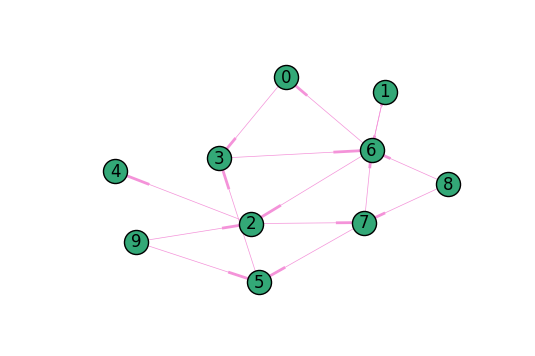

In [28]:
col_gen = ColorGenerator()
N, p = 10, 0.2
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_color=col_gen.get_color(), edge_color=col_gen.get_color())

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

10it [00:00, 11416.18it/s]


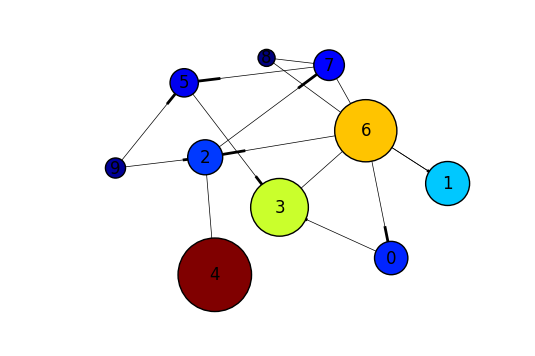

In [30]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

10it [00:00, 16263.30it/s]
10it [00:00, 24556.81it/s]


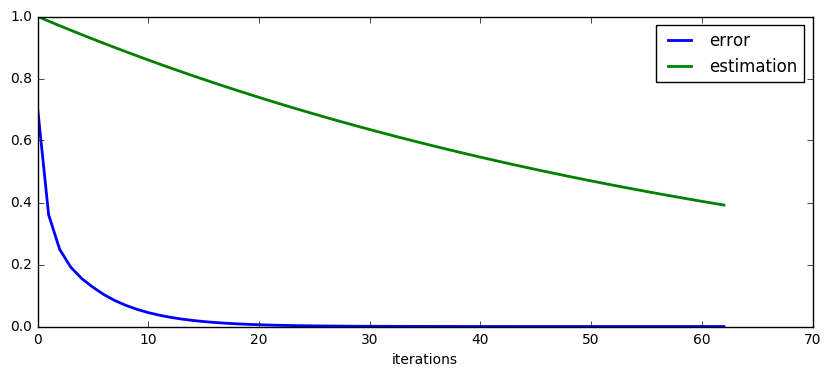

In [33]:
prob_matrix = create_page_rank_markov_chain(edges)
h = 1
delta = np.max([np.min(prob_matrix[i]) for i in range(len(prob_matrix))])
delta

pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - delta) ** (np.floor(x / h)), lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

In [71]:
n_grid = np.arange(5, 40, 2)
p_grid = np.arange(0.2, 1., 0.05)
iter_nums = []
for n in tqdm(n_grid):
    to_push = []
    for p in p_grid:
        start_distribution = np.ones((1, n)) / n
        edges = random_graph(n, p)
        pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
        to_push.append(len(pr_trace))
    iter_nums.append(to_push)

100%|██████████| 18/18 [00:01<00:00, 11.52it/s]


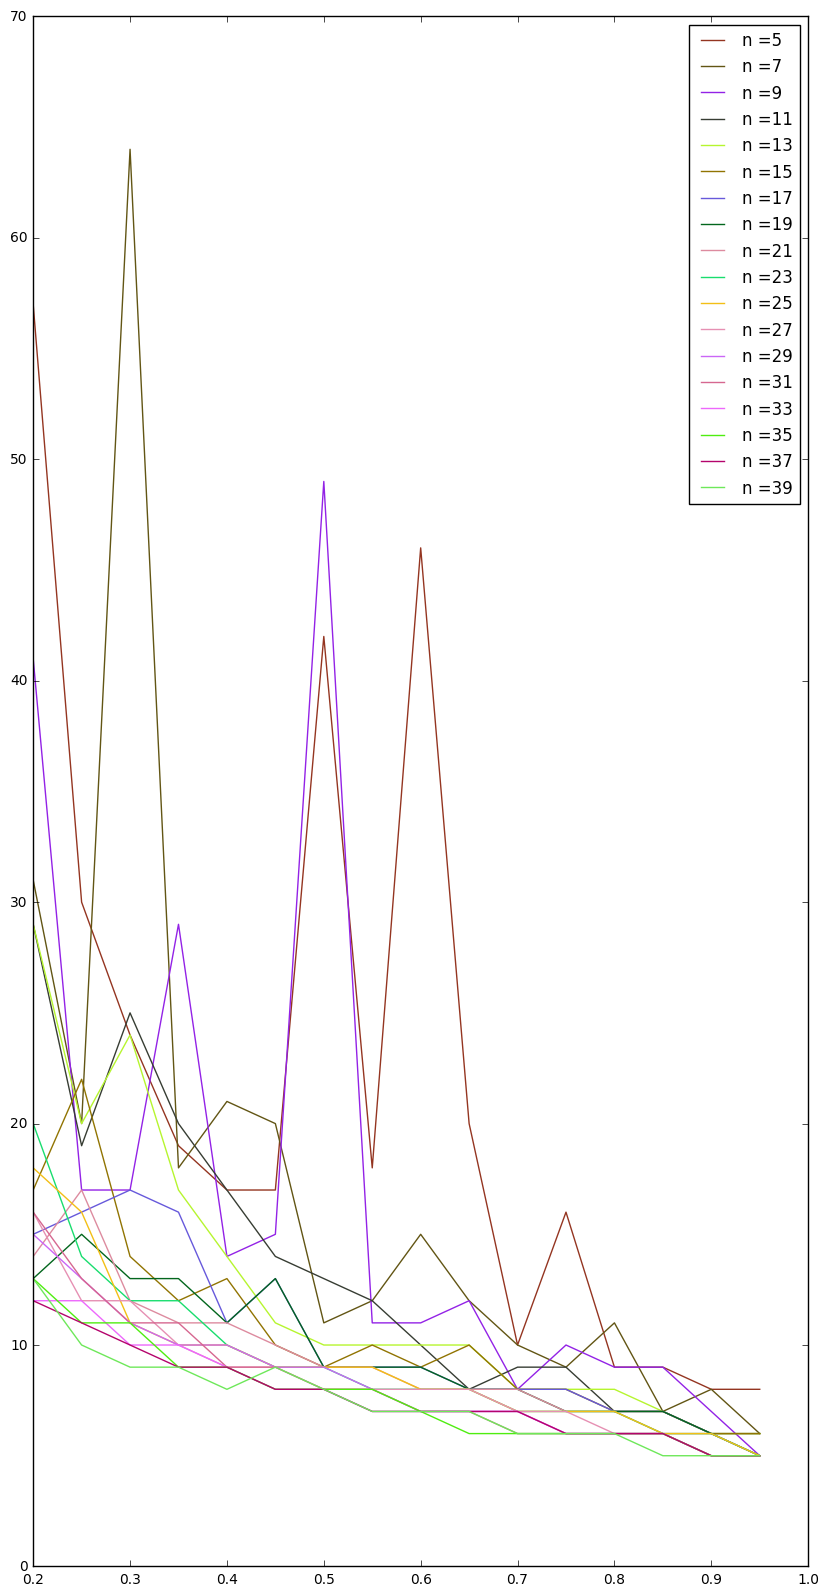

In [72]:
plt.figure(figsize=(10,20))
for i in range(len(iter_nums)):
    plt.plot(p_grid, iter_nums[i], color=col_gen.get_color(), label='n =' + str(n_grid[i]))
plt.legend()
plt.show()

In [55]:
n, p

(5, 1.0000000000000002)

In [46]:
start_distribution

array([[ 0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125,  0.125]])

In [48]:
create_page_rank_markov_chain(edges).shape

(6, 6)

In [42]:
edges

array([[5, 3]])

<Исследования и выводы>

## Часть 2

За выполнение этой части можно получить **5 баллов** и больше. В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [77]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': 
                link[0] = parsed_url.scheme
            if link[1] == '': 
                link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [78]:
urls = ['http://wikipedia.org/wiki/']
site = get_site(urls[0])
links = []

N = 10
for i in range(N):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

In [79]:
len(urls)

4694

In [80]:
N

10

In [81]:
filtered_results = list(filter(lambda x: x[0] < N and x[1] < N, links))

In [82]:
print(len(links), len(filtered_results))

6294 48


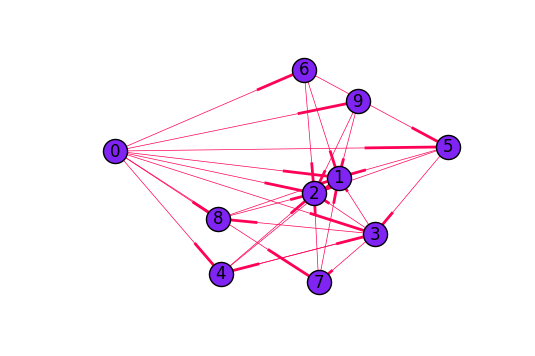

In [83]:
G_new = networkx.DiGraph()
G_new.add_edges_from(filtered_results)
plt.axis('off')
networkx.draw_networkx(G_new, width=0.5, node_color=col_gen.get_color(), edge_color=col_gen.get_color())

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000). Таким сайтом может быть, например, сайт <a href=http://ru.discrete-mathematics.org>кафедры Дискретной математики</a> (аккуратнее, если забанят, то лишитесь доступа к учебным материалам), <a href=http://yandexdataschool.ru>Школы анализа данных</a>, сайт магазина, больницы. Однако, советуем не выбирать сайты типа kremlin.ru, мало ли что.

Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

Для получения дополнительных баллов проведите аналогичные исследования для больших сайтов. Так же вы можете провести исследования, не ограничиваясь загрузкой только одного сайта.

In [84]:
# urls = ['http://ru.discrete-mathematics.org']
# site = get_site(urls[0])
# links = []

# curlen, lastlen, passed = 1,0, False
# while curlen != lastlen or passed:
#     try:
#         # Загружаем страницу по урлу и извлекаем из него все ссылки
#         # Не выставляйте sleep_time слишком маленьким, 
#         # а то еще забанят где-нибудь
#         links_from_url = load_links(urls[i], sleep_time=0.5)
#         # Если мы хотим переходить по ссылкам только определенного сайта
#         links_from_url = list(filter(lambda x: get_site(x) == site, 
#                                      links_from_url))
        
#         # Добавляем соответствующие вершины и ребра в веб-граф
#         for j in tqdm(range(len(links_from_url))):
#             # Такая ссылка уже есть
#             if links_from_url[j] in urls:
#                 links.append((i, urls.index(links_from_url[j])))
            
#             # Новая ссылка
#             else:
#                 links.append((i, len(urls)))
#                 urls.append(links_from_url[j])
    
#         passed = False

#     except:
#         passed = True
#         pass  # Не загрузилась с 5 попытки, ну и ладно

In [85]:
urls = ['http://wikimipt.org/wiki/']

site = get_site(urls[0])
links = []

N = 50
for i in tqdm(range(N)):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)): 
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

 78%|███████▊  | 39/50 [00:58<00:13,  1.27s/it]

'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)


 82%|████████▏ | 41/50 [01:00<00:10,  1.12s/it]

'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)


100%|██████████| 50/50 [01:12<00:00,  1.35s/it]


In [86]:
len(set(links))

4695

In [87]:
len(links)

6085

In [88]:
links_unique = list(set(links))

In [89]:
linki = []
fiel = open('/Users/semenfedotov/Desktop/Slupy/data/links_wukipedia.txt', 'r')
for line in fiel:
    linki.append(list(map(int,line.split())))

In [90]:
linki_filtered = list(filter(lambda x: x[0] < 50 and x[1] < 50,links_unique))

In [92]:
len(linki_filtered)

356

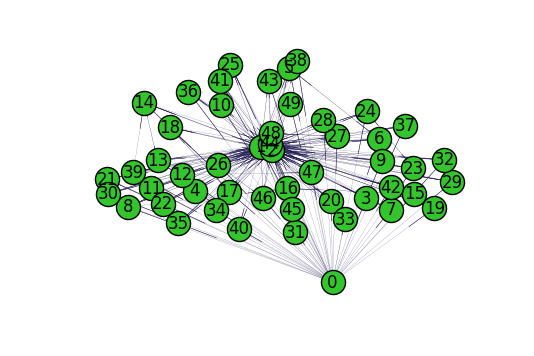

In [93]:
G_lf = networkx.DiGraph()
G_lf.add_edges_from(linki_filtered)
plt.axis('off')
networkx.draw_networkx(G_lf, width=0.1, node_color=col_gen.get_color(), edge_color=col_gen.get_color())

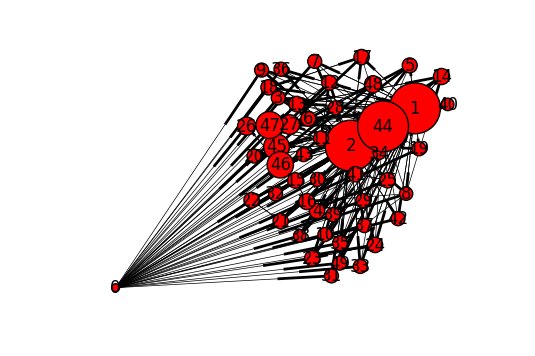

In [104]:

start_distribution = np.ones((1, 50)) / 50
pr_distribution = page_rank(linki_filtered, start_distribution)

size_const = 10 ** 4
G = networkx.DiGraph()
G.add_edges_from(linki_filtered)
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution)

#  Страницы, на которые часто ссылаются и будут иметь  больший вес

In [114]:
pr_distribution[44]

0.13419181717757461

In [116]:
top_10 = (list)(reversed(np.argsort(pr_distribution)))[:10]  # Топ 10 по вероятности
top_10 = set(top_10)
top_10

{1, 2, 16, 26, 27, 44, 45, 46, 47, 48}

In [119]:
induced = list(filter(lambda x: x[0] in top_10 and x[1] in top_10,linki)) # Индуцированная

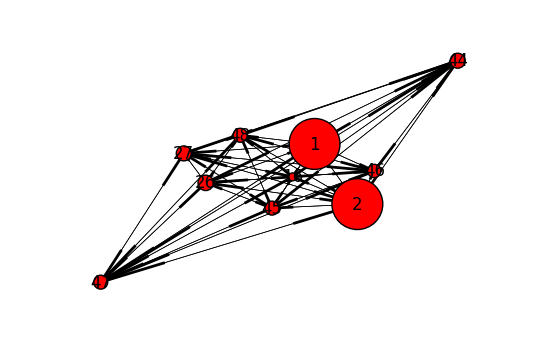

In [122]:
start_distribution = np.ones((1, 10)) / 10

size_const = 10 ** 4
G = networkx.DiGraph()
G.add_edges_from(induced)
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution)

In [94]:
import sys

In [96]:
# fiel = open('/Users/semenfedotov/Desktop/Slupy/data/links_wukipedia.txt', 'w+')
# for item in links_unique:
#     fiel.write("%s\n" % (str(item[0]) + " " + str(item[1])))